# NLP Final Project

In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import os
import pandas as pd

dataset = "amazon_data_set.csv"

if os.path.isfile(dataset):
    df = pd.read_csv("amazon_data_set.csv")
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)
display(df.head(10))

,Unnamed: 0,0,1,2
0,2698442,2,An Amalgam,This book is an amalgam of bits and pieces and...
1,2646715,5,Great!!!,"Well, not much to say. If you saw the first se..."
2,2119569,2,Hit&Miss,Babyface in his hey day always had a Cut that ...
3,816322,5,Great Buy,This text is considered The Bible for any poli...
4,1476562,3,What time is it anyway?,I thought the other reviews weren't serious ab...
5,17087,3,PRETTY FUNNY,"GOOD,BUT UNREALISTIC.THE GUY JUST QUIT GOING T..."
6,1838666,5,Lacy J. Dalton,I saw Lacy on Bill Anderson's Country Reunion ...
7,1442704,4,Great,Easy and enjoyable to watch. I would recommend...
8,1114640,3,Be careful!!!!,I am a very advanced exerciser and have used t...
9,1308335,5,the best book in the world!!!,Sahara special is one of the best books I have...


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df.columns=['overall','title','reviewText']

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     750000 non-null  int64 
 1   title       749983 non-null  object
 2   reviewText  750000 non-null  object
dtypes: int64(1), object(2)
memory usage: 17.2+ MB
None


In [6]:
print(df["reviewText"].iloc[0])

This book is an amalgam of bits and pieces and techniques and strategies from other books about creative thinking on the market. If the reader has read very little in the field, then this book might at least be a start.


# NLP Pre-Processing

In [7]:
sample_review = df["reviewText"].iloc[749999]
print(sample_review)

I have been searching and searching for a good litter box. I Have been through so many and have wasted so much money. When I got this, our smaller and younger cat was all for it. She used it immediately. Our bigger, older kitty was hesitant. I kept an eye on him and now he is using it! There is no mess and it's so much easier to clean! I highly recommend it!!!!


In [8]:
# HTML Entities

In [9]:
import html

decoded_review = html.unescape(sample_review)
print(decoded_review)

I have been searching and searching for a good litter box. I Have been through so many and have wasted so much money. When I got this, our smaller and younger cat was all for it. She used it immediately. Our bigger, older kitty was hesitant. I kept an eye on him and now he is using it! There is no mess and it's so much easier to clean! I highly recommend it!!!!


In [10]:
pattern = r"\&\#[0-9]+\;"
df = df.sample(frac=0.05)
df["preprocessed"] = df["reviewText"].str.replace(pat=pattern, repl="", regex=True)

print(df["preprocessed"].iloc[1])

I read this book and listened to the tape. Tolle is a gifted communicator of spiritual ideas. But Tolle is a man, not God, and remember: he's selling something. His main points, that we are not our minds and we should live in the present, are presented in the most clear and persuasive manner I've ever seen. I've found them enormously helpful. Yet, as a lifelong Lutheran, I am skeptical of the many "spiritual truths" he issues so declaratively. He also endorses "A Course in Miracles," a New Age text supposedly channeled straight from God. It's time to start asking questions about his ideas. A good place to start would be Not Necessarily the New Age: Critical Essays, edited by Robert Basil. Other books about New Age thinking can be found in libraries. Just do a subject search on "New Age movement." Don't just adopt religious ideas because someone states them in a soothing, authoritative way--and various celebrities thought the book was great. Your soul and mind are too important.


In [11]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
#resources = ["wordnet", "stopwords", "punkt", \
 #            "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]
resources = ["wordnet", "stopwords"]
for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)

#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root

def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)

#apply our functions
df["preprocessed"] = df["preprocessed"].apply(lambda row: lemmatize_doc(row))

print(df["preprocessed"].iloc[1])

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/puneetsaxena/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/puneetsaxena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


I read this book and listen to the tape Tolle be a gifted communicator of spiritual idea But Tolle be a man not God and remember : he s sell something His main point that we be not our mind and we should live in the present be present in the most clear and persuasive manner I ve ever see I ve find them enormously helpful Yet as a lifelong Lutheran I be skeptical of the many spiritual truth he issue so declaratively He also endorse A Course in Miracles a New Age text supposedly channel straight from God It s time to start ask question about his idea A good place to start would be Not Necessarily the New Age : Critical Essays edit by Robert Basil Other book about New Age thinking can be find in library Just do a subject search on New Age movement Don t just adopt religious idea because someone state them in a soothing authoritative way -- and various celebrity think the book be great Your soul and mind be too important
CPU times: user 2min 28s, sys: 3.61 s, total: 2min 31s
Wall time: 2mi

In [12]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)

print(df["preprocessed"].iloc[1])

I read this book and listen to the tape Tolle be a gifted communicator of spiritual idea But Tolle be a man not God and remember : he s sell something His main point that we be not our mind and we should live in the present be present in the most clear and persuasive manner I ve ever see I ve find them enormously helpful Yet as a lifelong Lutheran I be skeptical of the many spiritual truth he issue so declaratively He also endorse A Course in Miracles a New Age text supposedly channel straight from God It s time to start ask question about his idea A good place to start would be Not Necessarily the New Age : Critical Essays edit by Robert Basil Other book about New Age thinking can be find in library Just do a subject search on New Age movement Don t just adopt religious idea because someone state them in a soothing authoritative way -- and various celebrity think the book be great Your soul and mind be too important


In [13]:
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[1])

I read this book and listen to the tape Tolle be a gifted communicator of spiritual idea But Tolle be a man not God and remember   he s sell something His main point that we be not our mind and we should live in the present be present in the most clear and persuasive manner I ve ever see I ve find them enormously helpful Yet as a lifelong Lutheran I be skeptical of the many spiritual truth he issue so declaratively He also endorse A Course in Miracles a New Age text supposedly channel straight from God It s time to start ask question about his idea A good place to start would be Not Necessarily the New Age   Critical Essays edit by Robert Basil Other book about New Age thinking can be find in library Just do a subject search on New Age movement Don t just adopt religious idea because someone state them in a soothing authoritative way    and various celebrity think the book be great Your soul and mind be too important


In [14]:
df["preprocessed"] = df["preprocessed"].str.lower()

print(df["preprocessed"].iloc[1])

i read this book and listen to the tape tolle be a gifted communicator of spiritual idea but tolle be a man not god and remember   he s sell something his main point that we be not our mind and we should live in the present be present in the most clear and persuasive manner i ve ever see i ve find them enormously helpful yet as a lifelong lutheran i be skeptical of the many spiritual truth he issue so declaratively he also endorse a course in miracles a new age text supposedly channel straight from god it s time to start ask question about his idea a good place to start would be not necessarily the new age   critical essays edit by robert basil other book about new age thinking can be find in library just do a subject search on new age movement don t just adopt religious idea because someone state them in a soothing authoritative way    and various celebrity think the book be great your soul and mind be too important


In [15]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)

print(df["preprocessed"].iloc[1])

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 

read book listen tape tolle gifted communicator spiritual idea tolle man god remember   sell something main point mind live present present clear persuasive manner ever see find enormously helpful yet lifelong lutheran skeptical many spiritual truth issue declaratively also endorse course miracles new age text supposedly channel straight god time start ask question idea good place start would necessarily new age   critical essays edit robert basil book new age thinking find library subject search new age movement adopt religious idea someone state soothing authoritative way    various celebrity think book great soul mind important


In [16]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

print(df["preprocessed"].iloc[1])

read book listen tape tolle gifted communicator spiritual idea tolle man god remember sell something main point mind live present present clear persuasive manner ever see find enormously helpful yet lifelong lutheran skeptical many spiritual truth issue declaratively also endorse course miracles new age text supposedly channel straight god time start ask question idea good place start would necessarily new age critical essays edit robert basil book new age thinking find library subject search new age movement adopt religious idea someone state soothing authoritative way various celebrity think book great soul mind important


In [17]:
corpora = df["preprocessed"].values
tokenized = [corpus.split(" ") for corpus in corpora]

print(tokenized[1])

['read', 'book', 'listen', 'tape', 'tolle', 'gifted', 'communicator', 'spiritual', 'idea', 'tolle', 'man', 'god', 'remember', 'sell', 'something', 'main', 'point', 'mind', 'live', 'present', 'present', 'clear', 'persuasive', 'manner', 'ever', 'see', 'find', 'enormously', 'helpful', 'yet', 'lifelong', 'lutheran', 'skeptical', 'many', 'spiritual', 'truth', 'issue', 'declaratively', 'also', 'endorse', 'course', 'miracles', 'new', 'age', 'text', 'supposedly', 'channel', 'straight', 'god', 'time', 'start', 'ask', 'question', 'idea', 'good', 'place', 'start', 'would', 'necessarily', 'new', 'age', 'critical', 'essays', 'edit', 'robert', 'basil', 'book', 'new', 'age', 'thinking', 'find', 'library', 'subject', 'search', 'new', 'age', 'movement', 'adopt', 'religious', 'idea', 'someone', 'state', 'soothing', 'authoritative', 'way', 'various', 'celebrity', 'think', 'book', 'great', 'soul', 'mind', 'important']


In [18]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

In [19]:
tri_gram

In [20]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['chink', '1850', 'predictable', 'match4', 'uper', 'porterhouse', 'dresser', 'paperbacked', 'sawa', 'ph44', 'epsons', 'landsape', 'atlanta', 'bloody', 'goofball', 'pivot', 'gramercy', 'aight', 'archangel', 'behavioristic', '3oz', 'heirarchy', 'everythign', 'unchicken', 'rygaard', 'laughable', 'ctp', 'nationwide', 'taxi', 'accuracy', 'egad', 'acrobatic', 'mixing', 'compatriot', 'materpievce', 'announce', 'inot', 'high', 'clutch', 'flopper', 'weighing', 'mhz', 'troma', 'eighth', 'anouther', 'globalization', 'shure', 'wardens', 'helgenberger', 'profussion']


In [21]:
bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token.decode("utf-8") \
                      for token in bi_gram_tokens])

bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['', 'work_well', 'go_back', 'much_good', 'like_book', 'really_like', 'book_read', 'book_good', 'recommend_book', 'even_though', 'would_recommend', 'waste_time', 'main_character', 'save_money', 'long_time', 'think_would', 'year_old', 'one_best', 'find_book', 'first_time', 'work_great', 'look_forward', 'buy_book', '5_star', 'look_like', 'highly_recommend', 'pretty_good', 'seem_like', 'year_ago', 'waste_money', 'good_book', 'would_like', 'read_book', '1_2', 'sound_like', 'feel_like']


In [22]:
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token.decode("utf-8") \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [23]:
tokenized = [list(filter(lambda x: len(x) > 1, document)) \
             for document in tokenized]

print(tokenized[1])

['read', 'book', 'listen', 'tape', 'tolle', 'gifted', 'communicator', 'spiritual', 'idea', 'tolle', 'man', 'god', 'remember', 'sell', 'something', 'main', 'point', 'mind', 'live', 'present', 'present', 'clear', 'persuasive', 'manner', 'ever', 'see', 'find', 'enormously', 'helpful', 'yet', 'lifelong', 'lutheran', 'skeptical', 'many', 'spiritual', 'truth', 'issue', 'declaratively', 'also', 'endorse', 'course', 'miracles', 'new', 'age', 'text', 'supposedly', 'channel', 'straight', 'god', 'time', 'start', 'ask', 'question', 'idea', 'good', 'place', 'start', 'would', 'necessarily', 'new', 'age', 'critical', 'essays', 'edit', 'robert', 'basil', 'book', 'new', 'age', 'thinking', 'find', 'library', 'subject', 'search', 'new', 'age', 'movement', 'adopt', 'religious', 'idea', 'someone', 'state', 'soothing', 'authoritative', 'way', 'various', 'celebrity', 'think', 'book', 'great', 'soul', 'mind', 'important']


In [24]:
len(tokenized)

37500

In [25]:
tokenized

[['give',
  'product',
  'gift',
  'cooking',
  'enthusiast',
  'daughter',
  'delight',
  'grow',
  'fresh',
  'herb',
  'product',
  'train',
  'wreck',
  'carefully',
  'follow',
  'direction',
  'one',
  'plant',
  'sprout',
  'soon',
  'die',
  'perhaps',
  'prodict',
  'old',
  'properly',
  'handeled',
  'know',
  'waste',
  'money'],
 ['read',
  'book',
  'listen',
  'tape',
  'tolle',
  'gifted',
  'communicator',
  'spiritual',
  'idea',
  'tolle',
  'man',
  'god',
  'remember',
  'sell',
  'something',
  'main',
  'point',
  'mind',
  'live',
  'present',
  'present',
  'clear',
  'persuasive',
  'manner',
  'ever',
  'see',
  'find',
  'enormously',
  'helpful',
  'yet',
  'lifelong',
  'lutheran',
  'skeptical',
  'many',
  'spiritual',
  'truth',
  'issue',
  'declaratively',
  'also',
  'endorse',
  'course',
  'miracles',
  'new',
  'age',
  'text',
  'supposedly',
  'channel',
  'straight',
  'god',
  'time',
  'start',
  'ask',
  'question',
  'idea',
  'good',
  'pl

In [26]:
# Transform each text into a vector of word counts
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english",
                             preprocessor=corpora)

In [27]:
corpora[1]

'read book listen tape tolle gifted communicator spiritual idea tolle man god remember sell something main point mind live present present clear persuasive manner ever see find enormously helpful yet lifelong lutheran skeptical many spiritual truth issue declaratively also endorse course miracles new age text supposedly channel straight god time start ask question idea good place start would necessarily new age critical essays edit robert basil book new age thinking find library subject search new age movement adopt religious idea someone state soothing authoritative way various celebrity think book great soul mind important'

In [28]:
label = df["overall"].reset_index().drop('index',axis=1)

In [29]:
label

,overall
0,1
1,2
2,3
3,2
4,4
...,...
37495,3
37496,1
37497,5
37498,4


# Ceate the Dataframe to feed to models such as countvectorizer,word2vec,tfidf

In [30]:
from textblob import TextBlob
import numpy as np

model_df = pd.DataFrame(corpora, columns=['text'])
model_df["label"] = label
model_df = model_df[model_df['label']!= 3]
model_df['Target'] = np.where(model_df['label']>3, 1, 0)
model_df.head(10)


,text,label,Target
0,give product gift cooking enthusiast daughter ...,1,0
1,read book listen tape tolle gifted communicato...,2,0
3,must mouse close computer work poor range cove...,2,0
4,slant great followup queen angels wish know re...,4,1
5,disk almost empty excel file cd value,1,0
6,big trouble little china lot fun kind movie ho...,4,1
7,suck good light weight wheel good vacuming one...,2,0
8,automatic would good purchase unfortunately fe...,2,0
9,seem work ok electrolysis year far gadget work...,2,0
10,think would put 2 cent would suggest purchase ...,1,0


In [31]:
list(corpora)[1]

'read book listen tape tolle gifted communicator spiritual idea tolle man god remember sell something main point mind live present present clear persuasive manner ever see find enormously helpful yet lifelong lutheran skeptical many spiritual truth issue declaratively also endorse course miracles new age text supposedly channel straight god time start ask question idea good place start would necessarily new age critical essays edit robert basil book new age thinking find library subject search new age movement adopt religious idea someone state soothing authoritative way various celebrity think book great soul mind important'

In [33]:
blob = TextBlob((model_df.text[1]))
str(blob.correct())

'read book listen tape toll gifted communication spiritual idea toll man god remember sell something main point mind live present present clear persuasion manner ever see find enormously helpful yet sidelong lutheran skeptically many spiritual truth issue declaratively also endorse course miracles new age text supposedly channel straight god time start ask question idea good place start would necessarily new age critical essays edit robert basil book new age thinking find library subject search new age movement adopt religious idea someone state soothing authoritative way various celebrity think book great soul mind important'

In [34]:
def polarity_txt(text):
  return TextBlob(text).sentiment[0]

In [35]:

def subj_txt(text):
  return  TextBlob(text).sentiment[1]

In [36]:

def len_text(text):
  if len(text.split())>0:
         return len(corpora[text.index.step])/len(text.split())
  else:
         return 0

In [37]:
model_df['polarity'] = model_df['text'].apply(polarity_txt)
model_df.head(2)

,text,label,Target,polarity
0,give product gift cooking enthusiast daughter ...,1,0,0.020000
1,read book listen tape tolle gifted communicato...,2,0,0.143273


In [38]:
model_df['subjectivity'] = model_df['text'].apply(subj_txt)
model_df.head(2)


,text,label,Target,polarity,subjectivity
0,give product gift cooking enthusiast daughter ...,1,0,0.020000,0.360000
1,read book listen tape tolle gifted communicato...,2,0,0.143273,0.493394


In [39]:
#model_df['len'] = model_df['text'].apply(len_text)
#model_df.head()

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]


class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return [{'pos':  row['polarity'], 'sub': row['subjectivity'], } for _, row in data.iterrows()]

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_a = TfidfVectorizer()

training_features = vectorizer_a.fit_transform(model_df["text"])
test_features = vectorizer_a.transform(model_df["text"])


In [42]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('union', FeatureUnion(
        transformer_list=[

            # Pipeline for pulling features from the text
            ('text', Pipeline([
                ('selector', ItemSelector(key='text')),
                ('tfidf', vectorizer_a),
            ])),

            # Pipeline for pulling metadata features
            ('stats', Pipeline([
                ('selector', ItemSelector(key=['polarity', 'subjectivity','label'])),
                ('stats', TextStats()),  # returns a list of dicts
                ('vect', DictVectorizer()),  # list of dicts -> feature matrix
            ])),

        ],

        # weight components in FeatureUnion
        transformer_weights={
            'text': 0.9,
            'stats': 1.5,
        },
    ))
])

In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
seed = 40
X = model_df[['text', 'polarity', 'subjectivity','label']]
y = model_df['Target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [44]:
pipeline.fit?

In [45]:
pipeline.fit(x_train)


Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('text',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  ItemSelector(key='text')),
                                                                 ('tfidf',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                                                  encoding='utf-8',
                      

In [46]:
%%time
train_vec = pipeline.transform(x_train)
test_vec = pipeline.transform(x_test)
print("Checking that the number of features in train and test correspond: %s - %s" % (train_vec.shape, test_vec.shape))

Checking that the number of features in train and test correspond: (24053, 47990) - (6014, 47990)
CPU times: user 4.6 s, sys: 71.2 ms, total: 4.67 s
Wall time: 3.08 s


In [47]:
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from datetime import date

clf_sv = LinearSVC(C=1, class_weight='balanced', multi_class='ovr', random_state=40, max_iter=10000) #Support Vector machines
clf_sgd = SGDClassifier(max_iter=200,) # Stochastic Gradient Classifier

In [48]:
%%time
from sklearn.model_selection import cross_val_score

clfs = [clf_sv, clf_sgd]
cv = 3
for clf in clfs:
    scores = cross_val_score(clf,train_vec, y_train, cv=cv, scoring="accuracy" )
    print (scores)
    print (("Mean score: {0:.3f} (+/-{1:.3f})").format(
        np.mean(scores), np.std(scores)))

[0.8095535  0.81379396 0.81052763]
Mean score: 0.811 (+/-0.002)
[0.81741083 0.81454228 0.81402021]
Mean score: 0.815 (+/-0.001)
CPU times: user 1.69 s, sys: 247 ms, total: 1.94 s
Wall time: 1.47 s


In [49]:

%%time
from sklearn.metrics import classification_report
clf_sv.fit(train_vec, y_train )
y_pred = clf_sv.predict(test_vec)
list_result =[]
list_result.append(("SVC",accuracy_score(y_test, y_pred)))
clf_sgd.fit(train_vec, y_train )
y_pred = clf_sgd.predict(test_vec)
list_result.append(("SGD",accuracy_score(y_test, y_pred)))

CPU times: user 849 ms, sys: 76.3 ms, total: 925 ms
Wall time: 699 ms


In [50]:
list_result

[('SVC', 0.8234120385766545), ('SGD', 0.8260724975058198)]

# CountVectorizer Model

In [51]:

#vectorizer
cv=CountVectorizer()
msk = np.random.rand(len(model_df)) < 0.8# this steps generates word counts for the words in your docs
train_data = model_df[msk]
test_data = model_df[~msk]

training_features = cv.fit_transform(train_data["text"])    
test_features = cv.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

Accuracy on the IMDB dataset: 78.36


In [52]:

#vectorizer
#cv=CountVectorizer()
#msk = np.random.rand(len(model_df)) < 0.8# this steps generates word counts for the words in your docs
#train_data = model_df[msk]
#test_data = model_df[~msk]

#training_features = cv.fit_transform(train_data["text"])    
#test_features = cv.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(train_vec, y_train)
y_pred = model.predict(test_vec)

# Evaluation
acc = accuracy_score(y_test, y_pred)

print("Accuracy on the IMDB dataset: {:.2f}".format(acc*100))

Accuracy on the IMDB dataset: 82.34


In [53]:
print((y_train))

[1 0 0 ... 1 0 1]


In [54]:
print((train_data["text"]))

1        read book listen tape tolle gifted communicato...
3        must mouse close computer work poor range cove...
4        slant great followup queen angels wish know re...
5                    disk almost empty excel file cd value
6        big trouble little china lot fun kind movie ho...
                               ...                        
37491    corky say engineering treatise indepth able de...
37492    movie really funny definitely go win academy a...
37494    dvd lynyrd skynyrd 38 special must though unde...
37497    admit want read book saw preview movie like em...
37498    book pack practical information homeowner want...
Name: text, Length: 23944, dtype: object


In [55]:

# Transform each text into a vector of word counts
vectorizer_a = TfidfVectorizer()

training_features = vectorizer_a.fit_transform(train_data["text"])
test_features = vectorizer_a.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 81.99


In [56]:
# Transform each text into a vector of word counts
vectorizer_a = TfidfVectorizer(max_features=10000,stop_words='english')

training_features = vectorizer_a.fit_transform(train_data["text"])
test_features = vectorizer_a.transform(test_data["text"])

# Training
model = LinearSVC()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)

# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 80.97


In [57]:
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)
# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 68.99


In [58]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(training_features, train_data["Target"])
y_pred = model.predict(test_features)
# Evaluation
acc = accuracy_score(test_data["Target"], y_pred)

print("Accuracy on the Amazon dataset: {:.2f}".format(acc*100))

Accuracy on the Amazon dataset: 75.57


#best is the  TFIDF model with LinearSVC algorithm as best result

In [59]:
import spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 8.0MB/s eta 0:00:011    |████                            | 101.2MB 5.1MB/s eta 0:02:24     |████████████████████▊           | 537.3MB 830kB/s eta 0:05:50     |████████████████████████        | 623.1MB 3.3MB/s eta 0:01:02     |█████████████████████████▏      | 650.0MB 4.7MB/s eta 0:00:39███████████████▌      | 661.0MB 4.0MB/s eta 0:00:42 0:00:24     |█████████████████████████████   | 752.3MB 3.4MB/s eta 0:00:23  | 769.4MB 11.9MB/s eta 0:00:05  | 771.4MB 11.9MB/s eta 0:00:05  | 771.9MB 11.9MB/s eta 0:00:05     |██████████████████████████████  | 776.0MB 11.9MB/s eta 0:00:05��████▏ | 780.8MB 34.7MB/s eta 0:00:02�██▍ | 787.4MB 4.1MB/s eta 0:00:10�██▋ | 790.8MB 4.1MB/s eta 0:00:09    |██████████████████████████████▋ | 791.7MB 4.1MB/s eta 0:00:09��████████████████████▊ | 795.6MB 23.4MB/s eta 0:00:02��████████████████████▉ | 796.9MB 23.4MB/s eta 0:00:02ta 0:00:02
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl 

In [60]:
nlp = spacy.load('en_core_web_lg')

OSError: [E050] Can't find model 'en_core_web_lg'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [61]:

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM, Embedding
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.layers import Dense, Input, LSTM, Bidirectional, Activation, Conv1D, GRU, TimeDistributed
from keras.layers import Dropout, Embedding, GlobalMaxPooling1D, MaxPooling1D, Add, Flatten, SpatialDropout1D
from keras.layers import GlobalAveragePooling1D, BatchNormalization, concatenate
from keras.layers import Reshape, merge, Concatenate, Lambda, Average
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

Using TensorFlow backend.


In [62]:
from sklearn.model_selection import train_test_split
import time
X = model_df['text']
y =model_df['Target']
encoder = LabelEncoder()
y = encoder.fit_transform(y)
Y = np_utils.to_categorical(y)
##Create the tf-idf vector
vectorizer = TfidfVectorizer(min_df=3, max_df=0.2, max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = None)

In [63]:
seed = 40
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify=y)
vectorizer.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.2, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=1, stop_words=None, strip_accents='unicode',
                sublinear_tf=1, token_pattern='\\w{1,}', tokenizer=None,
                use_idf=1, vocabulary=None)

In [64]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}
tokenize = vectorizer.build_tokenizer()
preprocess = vectorizer.build_preprocessor()
 
def to_sequence(tokenizer, preprocessor, index, text):
    words = tokenizer(preprocessor(text))
    indexes = [index[word] for word in words if word in index]
    return indexes

X_train_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_train]
print(X_train_sequences[0])

[12197, 7946, 8386, 9434, 13789, 14991, 13907, 8325, 11881, 15377, 10709, 9447, 9356, 13381, 13855, 2416, 12658, 5119, 904, 9070, 10491, 13106, 11032, 4633, 4183, 721, 11028, 1494, 14872, 2432, 4679, 7314, 4536, 14991, 9356, 5572, 2607, 8615, 13383, 11352, 9864, 1200, 8986, 8325, 4712, 8615, 12974, 7531, 1017, 125, 12334, 1923, 14657, 2147, 12075, 11162, 900, 12438]


In [65]:
# Compute the max lenght of a text

MAX_SEQ_LENGHT=60

N_FEATURES = len(vectorizer.get_feature_names())
X_train_sequences = pad_sequences(X_train_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)
print(X_train_sequences[0])

[15434 15434 12197  7946  8386  9434 13789 14991 13907  8325 11881 15377
 10709  9447  9356 13381 13855  2416 12658  5119   904  9070 10491 13106
 11032  4633  4183   721 11028  1494 14872  2432  4679  7314  4536 14991
  9356  5572  2607  8615 13383 11352  9864  1200  8986  8325  4712  8615
 12974  7531  1017   125 12334  1923 14657  2147 12075 11162   900 12438]


In [66]:

X_test_sequences = [to_sequence(tokenize, preprocess, word2idx, x) for x in x_test]
X_test_sequences = pad_sequences(X_test_sequences, maxlen=MAX_SEQ_LENGHT, value=N_FEATURES)

In [67]:

EMBEDDINGS_LEN = 300

embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, EMBEDDINGS_LEN))
for word, idx in word2idx.items():
    try:
        embedding = nlp.vocab[word].vector
        embeddings_index[idx] = embedding
    except:
        pass
      
print("EMBEDDINGS_LEN=", EMBEDDINGS_LEN)

EMBEDDINGS_LEN= 300


In [68]:
model = Sequential()
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(300, dropout=0.2))
model.add(Dense(len(set(y)), activation='softmax'))
 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 60, 300)           4630500   
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               721200    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 602       
Total params: 5,352,302
Trainable params: 721,802
Non-trainable params: 4,630,500
_________________________________________________________________
None


In [69]:
model.fit(X_train_sequences, y_train, 
          epochs=5, batch_size=128, verbose=1, 
          validation_split=0.1)
 
scores = model.evaluate(X_test_sequences, y_test, verbose=1)
print("Accuracy:", scores[1])  #
list_result.append(("LSTM Simple", scores[1]))


Train on 21647 samples, validate on 2406 samples
Epoch 1/5
21647/21647 [==============================] - 74s 3ms/step - loss: 0.6933 - accuracy: 0.5012 - val_loss: 0.6931 - val_accuracy: 0.5037
Epoch 2/5
21647/21647 [==============================] - 70s 3ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.4963
Epoch 3/5
21647/21647 [==============================] - 66s 3ms/step - loss: 0.6932 - accuracy: 0.4977 - val_loss: 0.6931 - val_accuracy: 0.5037
Epoch 4/5
21647/21647 [==============================] - 65s 3ms/step - loss: 0.6932 - accuracy: 0.4981 - val_loss: 0.6932 - val_accuracy: 0.4963
Epoch 5/5
6014/6014 [==============================] - 8s 1ms/step
Accuracy: 0.4981709420681


In [70]:
pd.DataFrame(list_result, columns=['model', 'accuracy'])

,model,accuracy
0,SVC,0.823412
1,SGD,0.826072
2,LSTM Simple,0.498171


# Ensemble

In [71]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [72]:
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

In [3]:
X = cv.transform(X_train)
y = y_train

label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]"%(scores.mean(), scores.std(), label))
        
    clf.fit(X, y)
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X, y, clf=clf, legend=2)
    #plt.title(label)

#plt.show()

NameError: name 'cv' is not defined

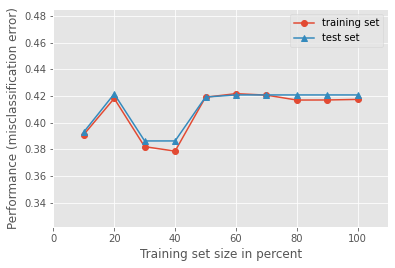

In [144]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, bagging1, print_model=False, style='ggplot')
plt.show()

In [132]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

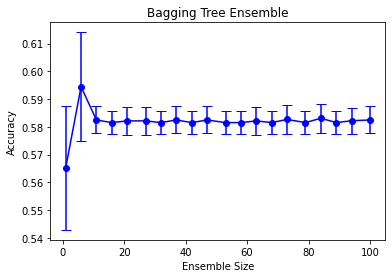

In [138]:
plt.figure()
num_est = np.linspace(1,100,20).astype(int)
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

# Boosting

In [139]:
import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [140]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=1)

num_est = [1, 2, 3, 10]
label = ['AdaBoost (n_est=1)', 'AdaBoost (n_est=2)', 'AdaBoost (n_est=3)', 'AdaBoost (n_est=10)']

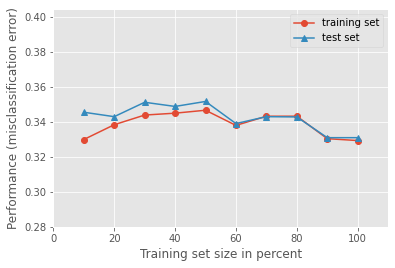

In [141]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

boosting = AdaBoostClassifier(base_estimator=clf, n_estimators=10)
        
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, boosting, print_model=False, style='ggplot')
plt.show()

In [142]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:
    ada_clf = AdaBoostClassifier(base_estimator=clf, n_estimators=n_est)
    scores = cross_val_score(ada_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

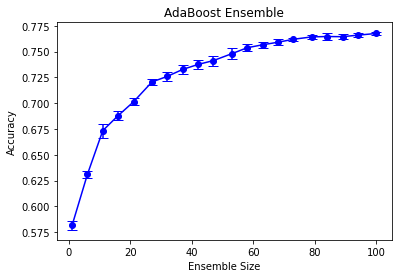

In [143]:
plt.figure()
num_est = np.linspace(1,100,20).astype(int)
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('AdaBoost Ensemble');
plt.show()

# Stacking

In [145]:
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

In [146]:
clf1 = KNeighborsClassifier(n_neighbors=1)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
                          meta_classifier=lr)

In [ ]:
label = ['KNN', 'Random Forest', 'Naive Bayes', 'Stacking Classifier']
clf_list = [clf1, clf2, clf3, sclf]

fig = plt.figure(figsize=(10,8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)

clf_cv_mean = []
clf_cv_std = []
for clf, label, grd in zip(clf_list, label, grid):
        
    scores = cross_val_score(clf, X.toarray(), y, cv=3, scoring='accuracy')
    print ("Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label))
    clf_cv_mean.append(scores.mean())
    clf_cv_std.append(scores.std())
        
    clf.fit(X, y)
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X, y, clf)
    #plt.title(label)

#plt.show()

In [ ]:
#plot classifier accuracy    
plt.figure()
num_est = np.linspace(1,100,20).astype(int)
(_, caps, _) = plt.errorbar(range(4), clf_cv_mean, yerr=clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.xticks(range(4), ['KNN', 'RF', 'NB', 'Stacking'])        
plt.ylabel('Accuracy'); plt.xlabel('Classifier'); plt.title('Stacking Ensemble');
plt.show()

In [ ]:
#plot learning curves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
plt.figure()
plot_learning_curves(X_train, y_train, X_test, y_test, sclf, print_model=False, style='ggplot')
plt.show()

# First MOdel - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
# Train the model
model = LogisticRegression()

model.fit(cv.transform(X_train), y_train)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = model.predict(cv.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
from sklearn import metrics
def eval_predictions(y_test, y_pred):
    print ('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print ('precision:', metrics.precision_score(y_test, y_pred, average='weighted'))
    print ('recall:', metrics.recall_score(y_test, y_pred, average='weighted'))
    print ('F-measure:', metrics.f1_score(y_test, y_pred, average='weighted'))
eval_predictions(y_test, predictions)

In [ ]:
from matplotlib import pyplot as plt
plt.title('Receiver Operating Characteristic(ROC)')
plt.grid()
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn import svm
# Create CV training and test scores for various training set sizes

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(),
                                               cv.transform(X_train), y_train, cv=2, scoring='accuracy', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [ ]:
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Draw lines
plt.subplots(1, figsize=(7,7))
plt.grid()
plt.plot(train_sizes, train_mean, '--', color='green',  label="Training score")
plt.plot(train_sizes, test_mean, color='red', label="Cross-validation score")

    # Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
#plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

# 2nd Model - Random Forest

In [2]:
#from sklearn.linear_model import RandomForest,SGDClassifier
from sklearn.ensemble import RandomForestClassifier
# Train the model

forest = RandomForestClassifier(n_estimators=10, class_weight={0:10, 1:12}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = forest.predict(cv.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
eval_predictions(y_test, predictions)

In [ ]:
from matplotlib import pyplot as plt
plt.title('Receiver Operating Characteristic(ROC) - Random Forest')
plt.grid()
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(),
                                               cv.transform(X_train), y_train, cv=3)

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [ ]:
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Draw lines
plt.subplots(1, figsize=(7,7))
plt.grid()
plt.plot(train_sizes, train_mean, '--', color='green',  label="Training score")
plt.plot(train_sizes, test_mean, color='red', label="Cross-validation score")

    # Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
#plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [ ]:
3rd - SVM

In [ ]:
from sklearn import svm
# instantiate and train model, kernel=rbf 
svm_rbf = svm.SVC(random_state=12345)
svm_rbf.fit(cv.transform(X_train), y_train)

# evaulate model
y_pred_1 = svm_rbf.predict(cv.transform(X_test))
print(" SVM : ", y_pred_1)



eval_predictions(y_train, y_pred_1)


In [ ]:
from sklearn.model_selection import learning_curve
from sklearn import svm
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(svm.SVC(),
                                               cv.transform(X_test), y_train, cv=3, scoring='accuracy', n_jobs=-1,
                                               # 50 different sizes of the training set
                                               train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

In [ ]:
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

    # Draw lines
plt.subplots(1, figsize=(7,7))
plt.grid()
plt.plot(train_sizes, train_mean, '--', color='green',  label="Training score")
plt.plot(train_sizes, test_mean, color='red', label="Cross-validation score")

    # Draw bands
#plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
#plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
plt.title("Learning Curve for SVC")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout(); plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Predict the transformed test documents
predictions = svm_rbf.predict(cv.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
from matplotlib import pyplot as plt
plt.title('Receiver Operating Characteristic(ROC) - SVC')
plt.grid()
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Model LSTM and concatenate new columns


In [ ]:
from keras.models import Model
from keras.layers import Dense ,LSTM,concatenate,Input,Flatten,BatchNormalization, GRU

text_data = Input(shape=(MAX_SEQ_LENGHT,), name='text')
meta_data = Input(shape=(3,), name = 'meta')
x=(Embedding(len(vectorizer.get_feature_names()) + 1,
                    EMBEDDINGS_LEN,  # Embedding size
                    weights=[embeddings_index],
                    input_length=MAX_SEQ_LENGHT,
                    trainable=False))(text_data)
x2 = ((LSTM(300, dropout=0.2, recurrent_dropout=0.2)))(x)
x4 = concatenate([x2, meta_data])
x5 = Dense(150, activation='relu')(x4)
x6 = Dropout(0.25)(x5)
x7 = BatchNormalization()(x6)
out=(Dense(len(set(y)), activation="softmax"))(x7)
model = Model(inputs=[text_data, meta_data ], outputs=out)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())